In [2]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


df = pd.read_csv("cleaneData.csv")
df.head()


,Campaign_ID,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,CAMP-XAJI0Y,15895,39,Instagram,Video,35-44,Female,US,48297,2116,303.850267,0.329109,4.381225,1
1,CAMP-6DPBHS,960,8,LinkedIn,Video,45-54,Female,UK,15097,2340,1572.604167,0.063589,15.499768,1
2,CAMP-AHXTHV,38258,54,YouTube,Image,35-44,All,US,8134,2740,21.260913,4.703467,33.685763,1
3,CAMP-3A3ZMF,44832,28,Facebook,Text,25-34,Female,US,21801,4277,48.628212,2.056419,19.618366,1
4,CAMP-8MDD4V,11384,36,Google,Story,18-24,All,UK,16503,1488,144.966620,0.689814,9.016542,1


In [5]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      1000 non-null   object 
 1   Budget           1000 non-null   int64  
 2   Duration         1000 non-null   int64  
 3   Platform         1000 non-null   object 
 4   Content_Type     1000 non-null   object 
 5   Target_Age       1000 non-null   object 
 6   Target_Gender    1000 non-null   object 
 7   Region           1000 non-null   object 
 8   Clicks           1000 non-null   int64  
 9   Conversions      1000 non-null   int64  
 10  CTR              1000 non-null   float64
 11  CPC              1000 non-null   float64
 12  Conversion_Rate  1000 non-null   float64
 13  Success          1000 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 109.5+ KB


Campaign_ID        0
Budget             0
Duration           0
Platform           0
Content_Type       0
Target_Age         0
Target_Gender      0
Region             0
Clicks             0
Conversions        0
CTR                0
CPC                0
Conversion_Rate    0
Success            0
dtype: int64

In [6]:
x = df.drop('Platform', axis=1)
y = df['Platform']

In [7]:
x = pd.get_dummies(x, drop_first=True)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [10]:
numeric_cols = ['Budget', 'Clicks', 'Conversions', 'CTR', 'CPC', 'Conversion_Rate', 'Duration']
scaler = StandardScaler()
x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_test[numeric_cols] = scaler.transform(x_test[numeric_cols])


In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
y_pred = model.predict(x_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Acurácia: 0.19
[[ 6  4  8  8 13]
 [11  2  6  6 13]
 [ 9  2  8 14  7]
 [ 5  3  7 11  9]
 [ 5 10 10 12 11]]
              precision    recall  f1-score   support

    Facebook       0.17      0.15      0.16        39
      Google       0.10      0.05      0.07        38
   Instagram       0.21      0.20      0.20        40
    LinkedIn       0.22      0.31      0.26        35
     YouTube       0.21      0.23      0.22        48

    accuracy                           0.19       200
   macro avg       0.18      0.19      0.18       200
weighted avg       0.18      0.19      0.18       200



/var/folders/lx/jf9nhfvd6z1fsmgk74m3t8180000gn/T/ipykernel_40898/3022011521.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feat.values, y=top_feat.index, palette="viridis")


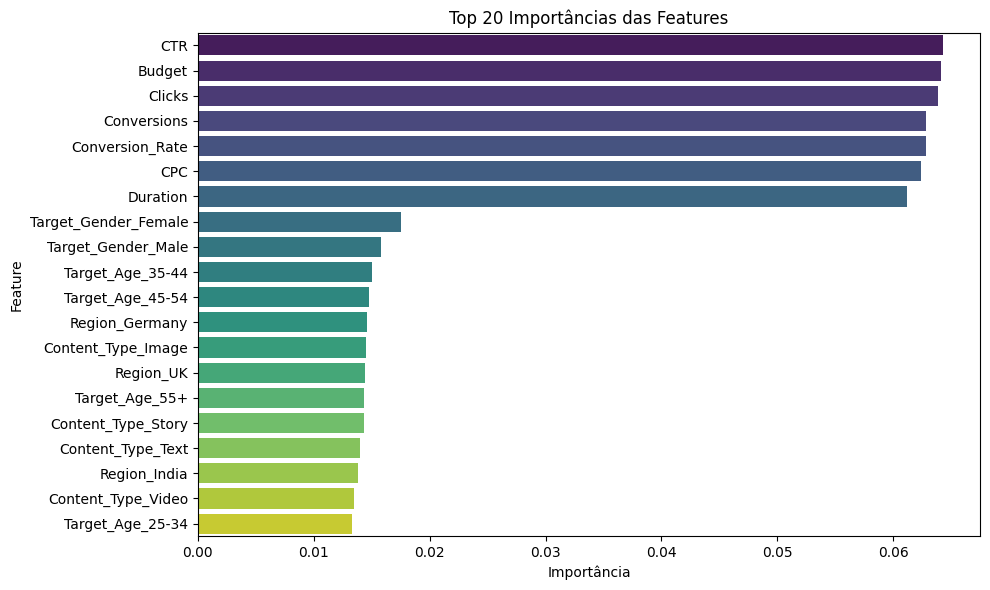

In [19]:
# Seleciona e plota apenas as top_n features mais importantes para melhor visualização
top_feat = feat_importances.sort_values(ascending=False).head(top_n)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_feat.values, y=top_feat.index, palette="viridis")
plt.title(f"Top {top_n} Importâncias das Features")
plt.xlabel("Importância")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [20]:
# Exibe os dados normalizados para conferência
display(novos_dados)

# Faz a predição
predicao = model.predict(novos_dados)
probas = model.predict_proba(novos_dados)

# Mostra o resultado da predição e as probabilidades para cada classe
for i, (pred, prob) in enumerate(zip(predicao, probas)):
    print(f"Exemplo {i+1}:")
    print(f"  Plataforma prevista: {pred}")
    print("  Probabilidades por classe:")
    for classe, p in zip(model.classes_, prob):
        print(f"    {classe}: {p:.2f}")
    print()

,Budget,Duration,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success,Campaign_ID_CAMP-02G3YU,Campaign_ID_CAMP-03O4GK,...,Target_Age_25-34,Target_Age_35-44,Target_Age_45-54,Target_Age_55+,Target_Gender_Female,Target_Gender_Male,Region_Germany,Region_India,Region_UK,Region_US
0,-1.356618,-1.483897,-1.757041,-1.714485,-0.304011,-0.173513,-0.273897,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.007560,-1.062314,-1.746391,-1.686833,-0.303984,-0.176384,-0.243341,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Exemplo 1:
  Plataforma prevista: YouTube
  Probabilidades por classe:
    Facebook: 0.22
    Google: 0.13
    Instagram: 0.22
    LinkedIn: 0.18
    YouTube: 0.25

Exemplo 2:
  Plataforma prevista: YouTube
  Probabilidades por classe:
    Facebook: 0.16
    Google: 0.13
    Instagram: 0.23
    LinkedIn: 0.16
    YouTube: 0.32

